## Lending Club Case Study EDA

### Data description
**Loan data**
It contains the complete loan data for all loans issued through the time period 2007 to 2011.

**Data dictionary**
It describes the meaning of these variables provided in loan data.

### Business problem
The data given above contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

### Goals
We will approach our analysis w.r.to below common goals:
   
#### Loan data analysis

**1. Know Your Data**
   - Data size
   - Columns and thier data types
   - Check data spread
   - Numeric vs Categorical Columns   

**2. Data Quality & Fix**
   - Check null values
   - Delete irrelevant data
   - Impute null values
   - Check duplicates
   - Data cleaning

**3. Derived Columns for Analysis**

**4. Data Content Analysis**
   - Univariate Analysis
   - Segmented Univariate Analysis
   - Correlation b/w features
   - Bivariate Analysis

**5. Conclusion**



In [5]:
import pandas as pd

# This is to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the data dictionary and loan data into pandas
data_dictionary = pd.read_excel('../data/Data_Dictionary.xlsx')
loan_data = pd.read_csv('../data/loan.csv', low_memory=False)

## Loan data analysis

### 1. Know You Data

In [7]:
loan_data.info(
    verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

In [8]:
all_null_column_percentage = 100 * (loan_data.isna().all(axis=0).sum() / loan_data.columns.size)
print('%.2f' % all_null_column_percentage, 'percent columns have 0 non-null values')

some_null_column_percentage = 100 * ((loan_data.isna().any(axis=0).sum() / loan_data.columns.size)) - all_null_column_percentage
print('%.2f' % some_null_column_percentage, 'percent columns have some non-null values (excluding complete non-nulls)')

48.65 percent columns have 0 non-null values
12.61 percent columns have some non-null values (excluding complete non-nulls)


Notice there are many columns with 0 non-null values, and a few with some non-nulls

We can check the unique values for each columns. This will be helpful to understand if we have **univariate data**, or **binary data**, any **ordinal data**, or any **continuous data**. Based on this, we can later think of binning these continuous values.

In [9]:
# For each numerical feature compute number of unique entries
unique_values = loan_data.nunique().sort_values()
unique_values[unique_values > 0]

policy_code                       1
collections_12_mths_ex_med        1
acc_now_delinq                    1
application_type                  1
tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
pymnt_plan                        1
initial_list_status               1
next_pymnt_d                      2
term                              2
loan_status                       3
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [10]:
# Most of numerical analysis needs to be fixed due to null columns
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,...,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


#### Conclusion of section 1. Know Your Data
Now, we have a good understanding of our data. We know that out data size is (39717 X 111). Almost half of these columns also have only null values, few have some null values. We have 87 numerical features from the above query, and the remaining will be 24 *(111-87)* categorical features in our dataset. Notice that few columns have a single unique value.

### 2. Data Quality & Fix
   - Check null values
   - Check duplicates
   - Remove irrelevant data
   - Impute null values
   - Data cleaning
   - Outlier detection and removal

#### 2.1 Check null values

We know from previous step that half of the columns are null. Let's clean that up.

In [11]:
loan_data.dropna(axis=1, how='all', inplace=True)

In [12]:
# Shape of data has changes with less columns
loan_data.shape

(39717, 57)

#### 2.2 Check duplicates

`id`, `member_id`, and `url` are the unique identifiers of the data-set. We can ignore them and check if we have any duplicate rows.

In [13]:
    # We can't find any row duplicates
    row_duplicates = loan_data.drop(labels=['id', 'member_id', 'url'], axis=1).duplicated().sum()
    print('Duplicate count is', row_duplicates)

Duplicate count is 0


#### 2.3 Remove irrelevant data

Let's begin with calculating the percentage of null values in each column

In [14]:
# We could also have done loan_data.isna().sum() but that's very slow in comparision to this approach. Count is read from 
# metadata and is served way faster.

null_counts = loan_data.shape[0] - loan_data.count()

In [15]:
def get_null_count_percentage():
    null_counts = loan_data.shape[0] - loan_data.count()
    total_rows = loan_data.shape[0]
    null_count_percentage = 100 * null_counts / total_rows
    return null_count_percentage

In [16]:
# Check columns with greater than 2 percent nulls
total_rows = loan_data.shape[0]
null_count_percentage = get_null_count_percentage()
null_count_percentage[null_count_percentage > 3]

emp_title                 6.19
desc                     32.58
mths_since_last_delinq   64.66
mths_since_last_record   92.99
next_pymnt_d             97.13
dtype: float64

In [17]:
# There are a lot of unique values for these categorical columns.
# Emp_title has around 6 percent nulls. Imputing these nulls will impact our result.
# We are dropping these fields for the analysis. We can safely drop other entries as null rate is very high
loan_data.drop(null_count_percentage[null_count_percentage > 2].index, axis=1, inplace=True)
print('Dropped columns with high null percentage')

Dropped columns with high null percentage


We are interested in **loan_status** which is either **Fully paid** or **Charged off** in our analysis, Let's remove other rows

In [18]:
loan_data = loan_data[(loan_data.loan_status == 'Fully Paid') | (loan_data.loan_status == 'Charged Off')]

Some variables have unique count of 1. Since they don't change at all, they can be removed.

In [19]:
# We see that there is no special property in these univariate columns
univariate_columns = loan_data.loc[0:5, loan_data.nunique() == 1]
univariate_columns

,pymnt_plan,initial_list_status,out_prncp,out_prncp_inv,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
1,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
2,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
3,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00
5,n,f,0.00,0.00,0.00,1,INDIVIDUAL,0,0.00,0,0.00


In [20]:
loan_data.drop(univariate_columns, axis=1, inplace=True)

In [21]:
# These field won't be useful for out analysis
loan_data.drop(['member_id', 'url', 'zip_code', 'title'], axis=1, inplace=True)

#### 2.4 Impute nulls

In [22]:
null_count_percentage = get_null_count_percentage()
null_count_percentage[null_count_percentage > 0].head()

revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.81
dtype: float64

Now, we notice that null percentage is less than 2 percent in general. We will replace all these null values with mod.

In [23]:
less_than_3_percentage_null_data = (get_null_count_percentage()).sort_values(ascending=False)
less_than_3_percentage_null_data = less_than_3_percentage_null_data[(less_than_3_percentage_null_data < 3) & (less_than_3_percentage_null_data > 0)]
for column in less_than_3_percentage_null_data.index:
    mode_val = loan_data[column].mode()[0]
    loan_data[column].fillna(value=mode_val, inplace=True)

#### 2.5 Data cleaning

In [24]:
# Trim percentage to float
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float64')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float64')

In [27]:
# Converting string amount columns into numeric data

columns = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','total_pymnt']
loan_data[columns] = loan_data[columns].apply(pd.to_numeric)

### Derived column for analysis

In [28]:
# issue_d (mmm-yy) can be broken month and year
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y')
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year

# last_pymnt_d (mmm-yy) can be broken month and year
loan_data['last_pymnt_d'] = pd.to_datetime(loan_data['last_pymnt_d'], format='%b-%y')
loan_data['last_pymnt_month'] = loan_data['last_pymnt_d'].dt.month
loan_data['last_pymnt_year'] = loan_data['last_pymnt_d'].dt.year

loan_data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,last_pymnt_month,last_pymnt_year
0,1077501,5000,5000,4975.00,36 months,10.65,162.87,B,B2,RENT,...,0.00,0.00,2015-01-01,171.62,May-16,0.00,12,2011,1,2015
1,1077430,2500,2500,2500.00,60 months,15.27,59.83,C,C4,RENT,...,117.08,1.11,2013-04-01,119.66,Sep-13,0.00,12,2011,4,2013
2,1077175,2400,2400,2400.00,36 months,15.96,84.33,C,C5,RENT,...,0.00,0.00,2014-06-01,649.91,May-16,0.00,12,2011,6,2014


### Data Content Analysis

#### Univariate analysis

In [29]:
loan_data['loan_amnt'].describe()

count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

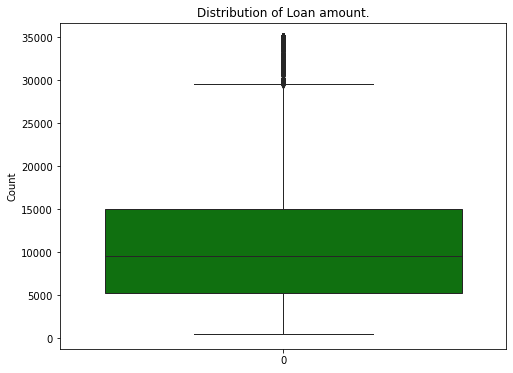

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data.loan_amnt, color="green", linewidth=1)
plt.title("Distribution of Loan amount.")
plt.ylabel("Count")
plt.show()

In [31]:
loan_data.funded_amnt.describe()

count   38577.00
mean    10784.06
std      7090.31
min       500.00
25%      5200.00
50%      9550.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

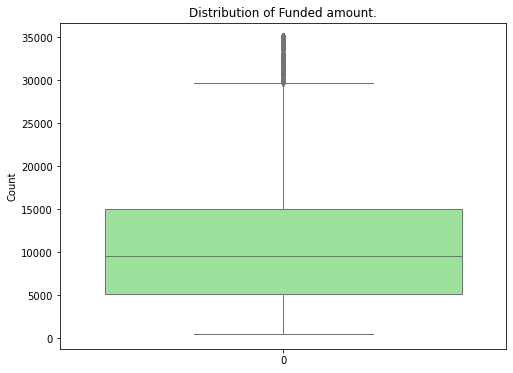

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data.funded_amnt, color="lightgreen", linewidth=1)
plt.title("Distribution of Funded amount.")
plt.ylabel("Count")
plt.show()

In [33]:
loan_data.funded_amnt_inv.describe()

count   38577.00
mean    10222.48
std      7022.72
min         0.00
25%      5000.00
50%      8733.44
75%     14000.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

Let's try plotting distribution plot of the loan amount, funded amount, and funded amount by investor.

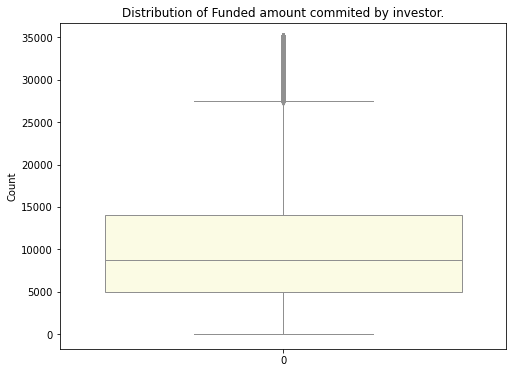

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data.funded_amnt_inv, color="lightyellow", linewidth=1)
plt.title("Distribution of Funded amount commited by investor.")
plt.ylabel("Count")
plt.show()

**Observation** 
- Most of the funded amount by investor is in range of 5000-15000

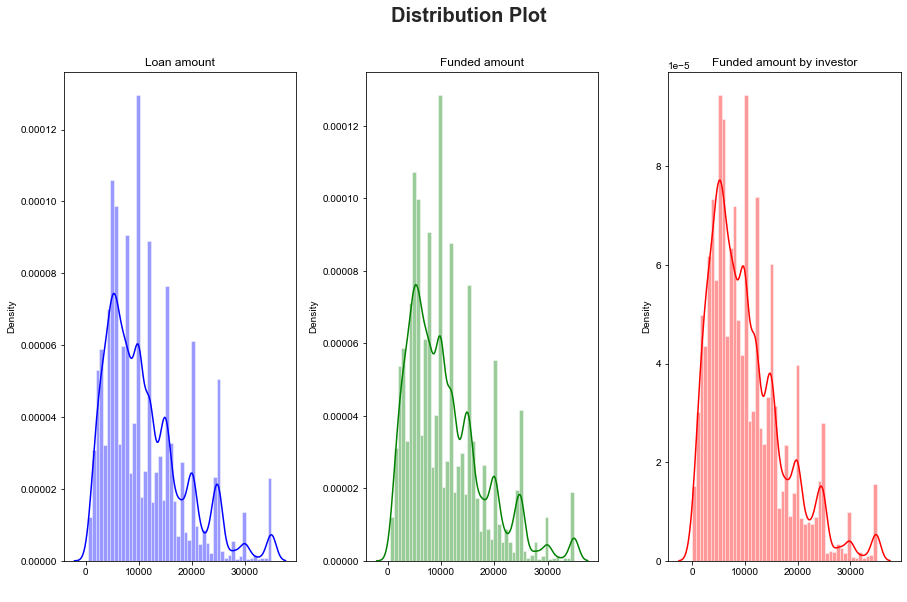

In [35]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize=(15,9))
                                                   
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.distplot(ax=axs[0], x=loan_data.loan_amnt, color='blue')
axs[0].set_title('Loan amount')

sns.distplot(ax=axs[1], x=loan_data.funded_amnt, color='green')
axs[1].set_title('Funded amount')

sns.distplot(ax=axs[2], x=loan_data.funded_amnt_inv, color='red')
axs[2].set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
axs[2].set_title('Funded amount by investor')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Distribution Plot', fontsize=20, fontweight='bold')
plt.show()


**Observation** 
- The three distribution plots look very similar.

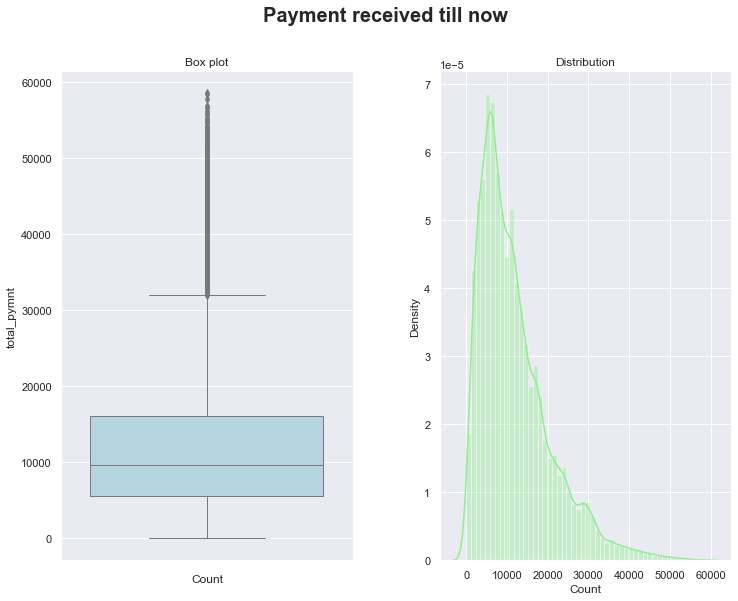

In [36]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], y=loan_data.total_pymnt, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=loan_data.total_pymnt, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Payment received till now', fontsize=20, fontweight='bold')
plt.show()


**Observation** 
- We got general idea on how much load amount is requested, processed by bank, and approved by the investor. There are few people who get higher loans.

In [37]:
loan_data.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

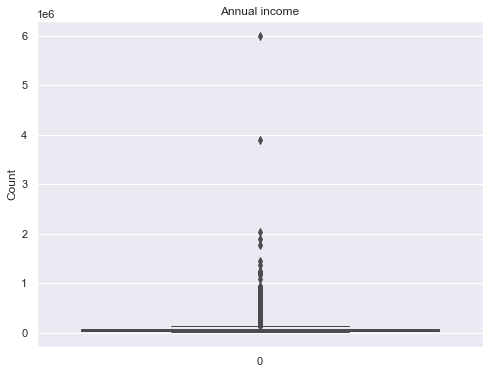

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=loan_data.annual_inc, color="red", linewidth=1)
plt.title("Annual income")
plt.ylabel("Count")
plt.show()

In [39]:
print(loan_data.annual_inc.quantile([0.75,0.90, 0.95, 0.97,0.98, 0.99]))

0.75    82000.00
0.90   115000.00
0.95   140004.00
0.97   165000.00
0.98   187000.00
0.99   234144.00
Name: annual_inc, dtype: float64


**Observation** 
- Due to outliers, the above box plot is unusable, let's try to annual income box plot for 99 percentile

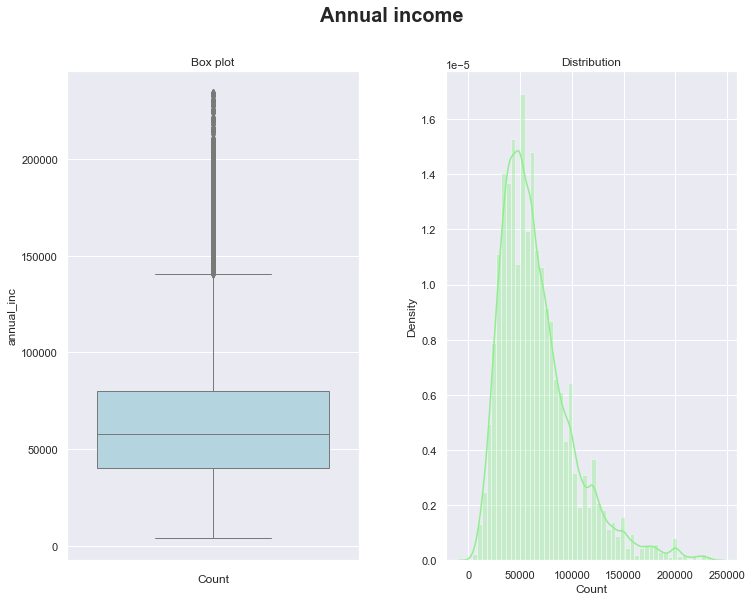

In [40]:
filtered_annual_income = loan_data[loan_data.annual_inc < loan_data.annual_inc.quantile(.99)]

fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], y=filtered_annual_income.annual_inc, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=filtered_annual_income.annual_inc, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Annual income', fontsize=20, fontweight='bold')
plt.show()


**Observation** 
- Around 50 percent of loan application have income more than 50000. Distribution looks even with little left alignment.

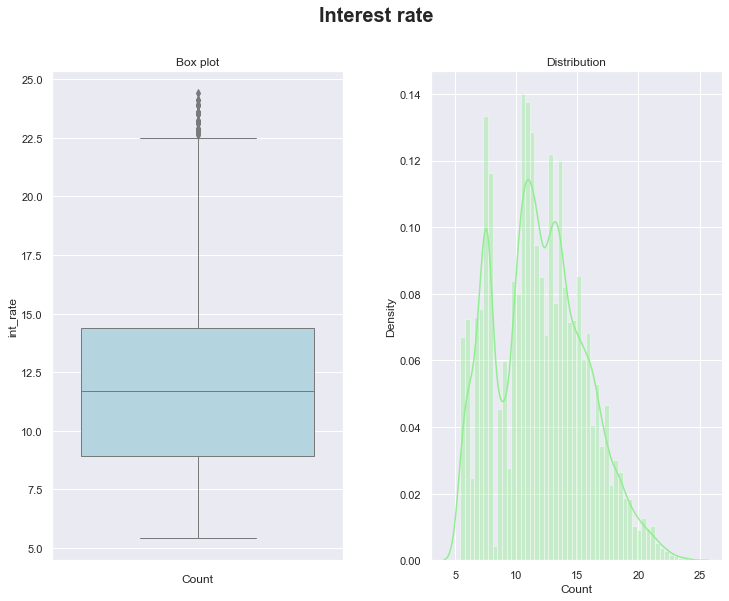

In [41]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], y=loan_data.int_rate, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=loan_data.int_rate, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Interest rate', fontsize=20, fontweight='bold')
plt.show()


**Observation** 
- Most of the interest rate is between `10% -15%`

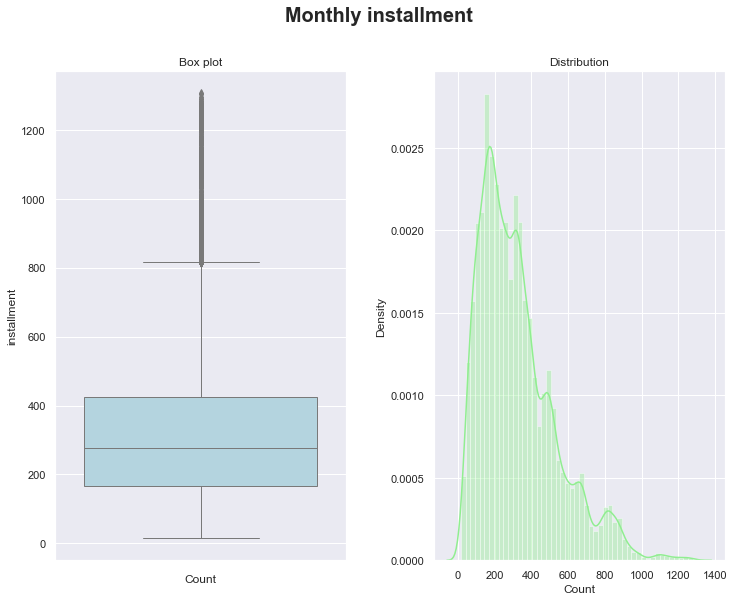

In [42]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(12,9))

sns.set_style('darkgrid')
sns.set_context('notebook')

sns.boxplot(ax=axs[0], y=loan_data.installment, color="lightblue", linewidth=1)
axs[0].set_title("Box plot")
axs[0].set_xlabel('Count')

                                                   
sns.distplot(ax=axs[1], x=loan_data.installment, color='lightgreen')
axs[1].set_title('Distribution')
axs[1].set_xlabel('Count')


plt.subplots_adjust(wspace=0.3)
fig.suptitle('Monthly installment', fontsize=20, fontweight='bold')
plt.show()


**Observation** 
- Most of the monthly payments are between `150-400`

Now let's dive into **categorical univariate analysis**

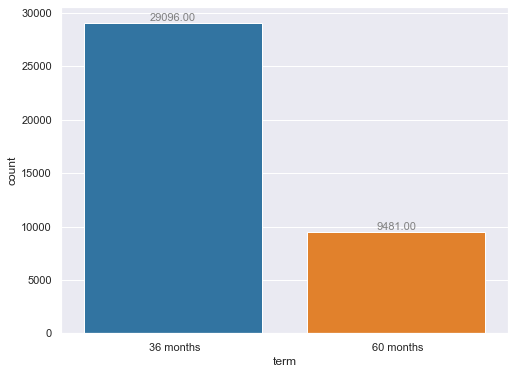

In [43]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=loan_data['term'])
sns.set_theme(style="whitegrid")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()


**Observation** 
- Preference of 36 months term is about 3 times that of 60 months

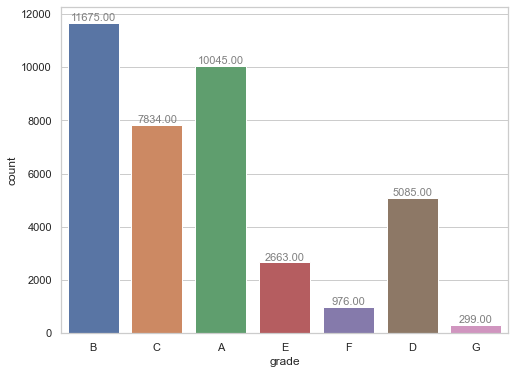

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=loan_data['grade'])
sns.set_theme(style="whitegrid")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**Observation** 
- Most of the loans are graded A, B, and C

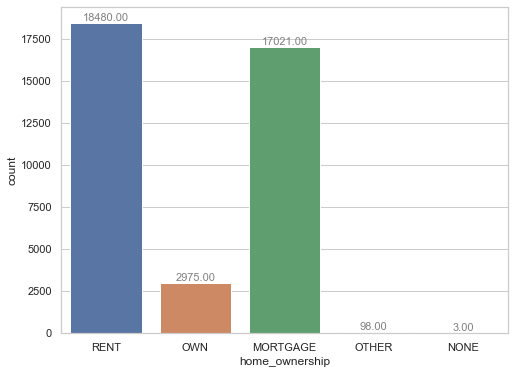

In [1270]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=loan_data['home_ownership'])
sns.set_theme(style="whitegrid")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**Observation** 
- Most of applicants are living in rented home or have mortgazed their home.

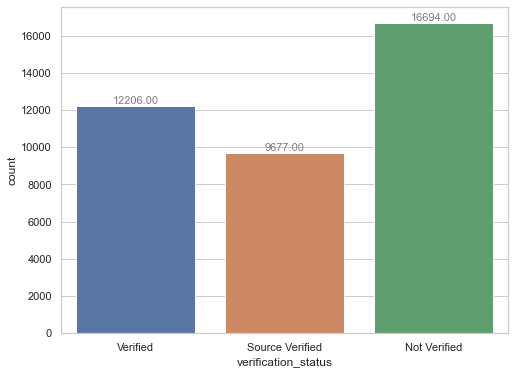

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=loan_data['verification_status'])
sns.set_theme(style="whitegrid")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**Observation** 
- There are many applicants who are not verified.

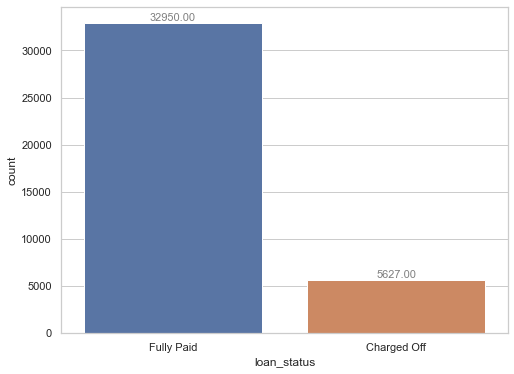

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=loan_data['loan_status'])
sns.set_theme(style="whitegrid")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**Observation** 
- Charged Off is around 6 times smaller than Fully Paid.

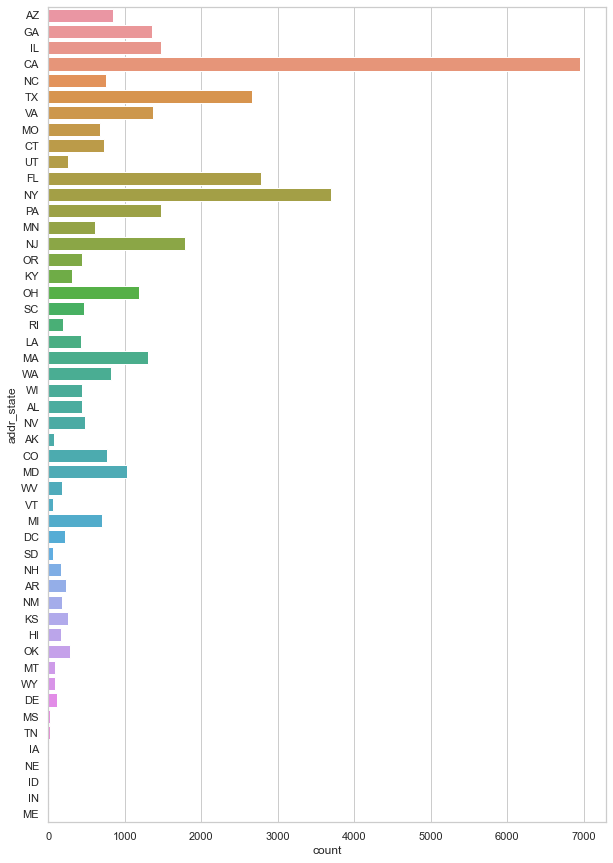

In [47]:
plt.figure(figsize=(10, 15))
sns.countplot(y=loan_data['addr_state'])
sns.set_theme(style="whitegrid")
plt.show()

**Observation** 
- High number of loans are applied from CA, NY, FL and TX

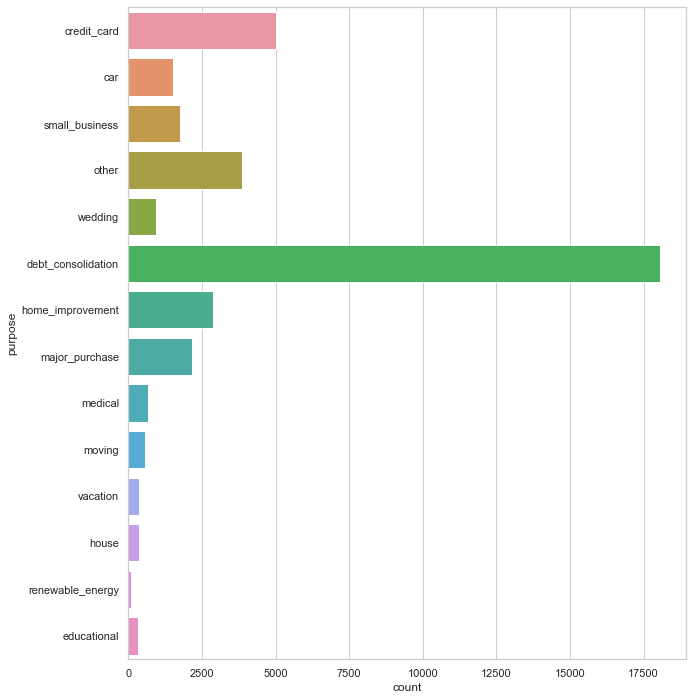

In [48]:
plt.figure(figsize=(10, 12))
sns.countplot(y=loan_data['purpose'])
sns.set_theme(style="whitegrid")
plt.show()

**Observation** 
- Lot of applicants take loan for debt consolidation and credit card.

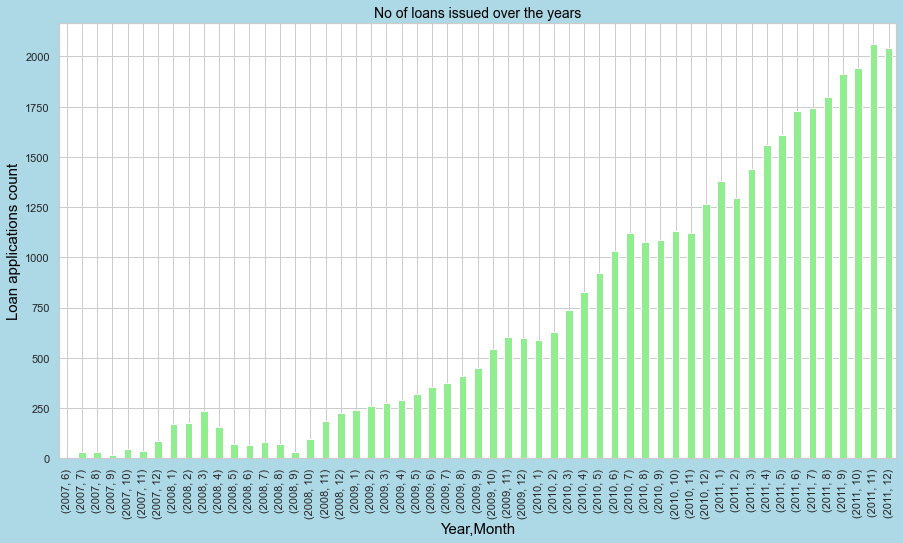

In [49]:
plt.figure(figsize=(15,8),facecolor='lightblue')
loan_data.groupby(['issue_year','issue_month']).id.count().plot(kind='bar', color='lightgreen')
plt.title("No of loans issued over the years",color='black',fontsize=14)
plt.ylabel('Loan applications count',color='black',fontsize=15)
plt.xlabel('Year,Month',color = 'black',fontsize=15)      
plt.show()

**Observation** 
- The count of loan application increased every year, except for loans issued in 2008, this is probably due to Recession.

#### Segmented univariate analysis

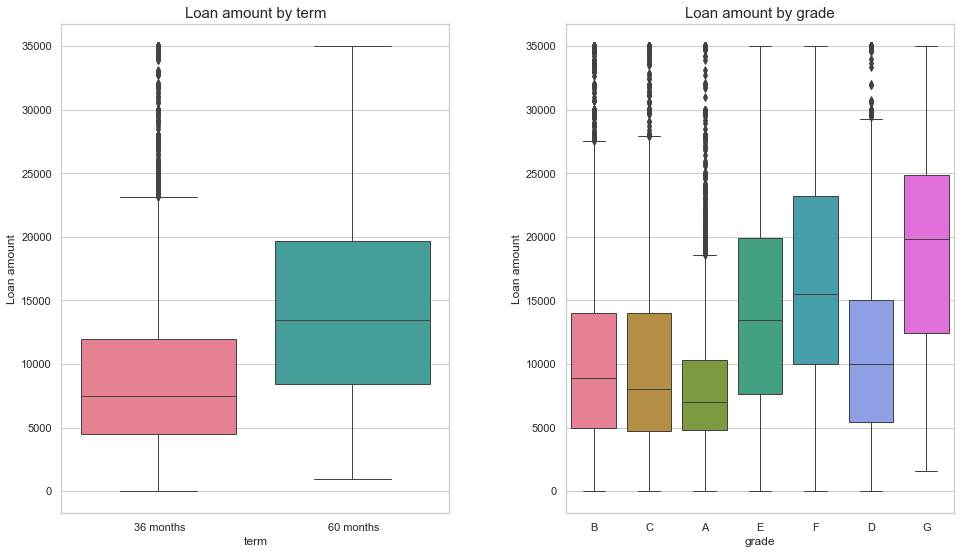

In [50]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(16,9))

sns.boxplot(ax=axs[0], data=loan_data, x = 'term', y=loan_data.funded_amnt_inv, color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Loan amount by term", fontsize=15)
axs[0].set_ylabel('Loan amount')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='grade', y=loan_data.funded_amnt_inv, color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Loan amount by grade', fontsize=15)
axs[1].set_ylabel('Loan amount')


plt.subplots_adjust(wspace=0.3)
plt.show()


**Observation**
- Higher loans have higher loan term.
- E, F, G grade loan have higher loan amount.

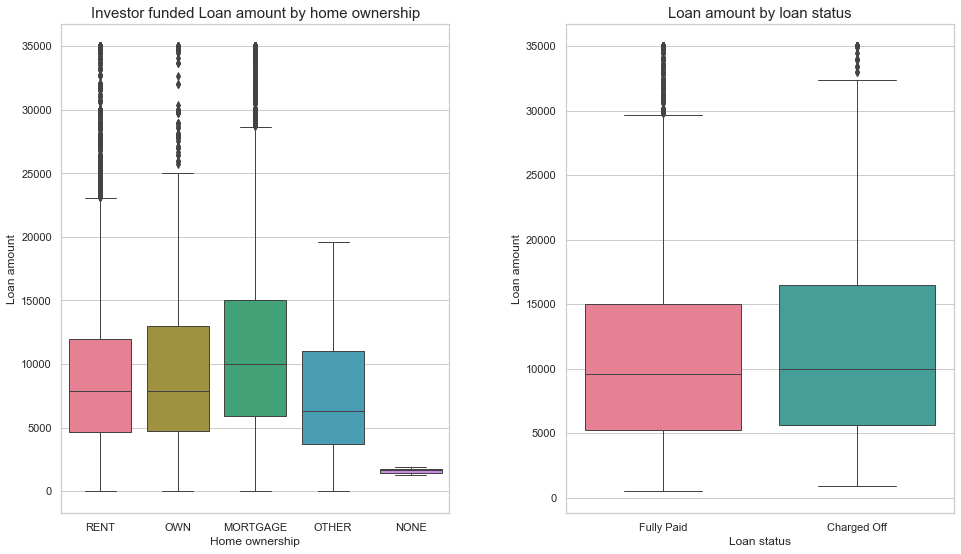

In [51]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(16,9))

sns.boxplot(ax=axs[0], data=loan_data, x = 'home_ownership', y=loan_data.funded_amnt_inv, color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Investor funded Loan amount by home ownership", fontsize=15)
axs[0].set_ylabel('Loan amount')
axs[0].set_xlabel('Home ownership')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y=loan_data.loan_amnt, color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Loan amount by loan status', fontsize=15)
axs[1].set_ylabel('Loan amount')
axs[1].set_xlabel('Loan status')


plt.subplots_adjust(wspace=0.3)
plt.show()


**Observation**
- People with home on mortgage got higher loans.
- Loan amount was greater for people who charged off.

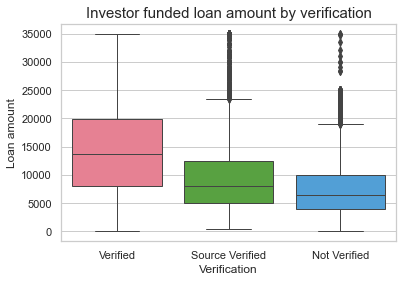

In [52]:
ax = sns.boxplot(data=loan_data, x = 'verification_status', y=loan_data.funded_amnt_inv, color="lightblue", linewidth=1, palette="husl")
ax.set_title("Investor funded loan amount by verification", fontsize=15)
ax.set_ylabel('Loan amount')
ax.set_xlabel('Verification')
plt.show()

**Observation**
- People who are verified got for higher loans amounts

Let's calculate relationship b/w Loan status and various numerical variables

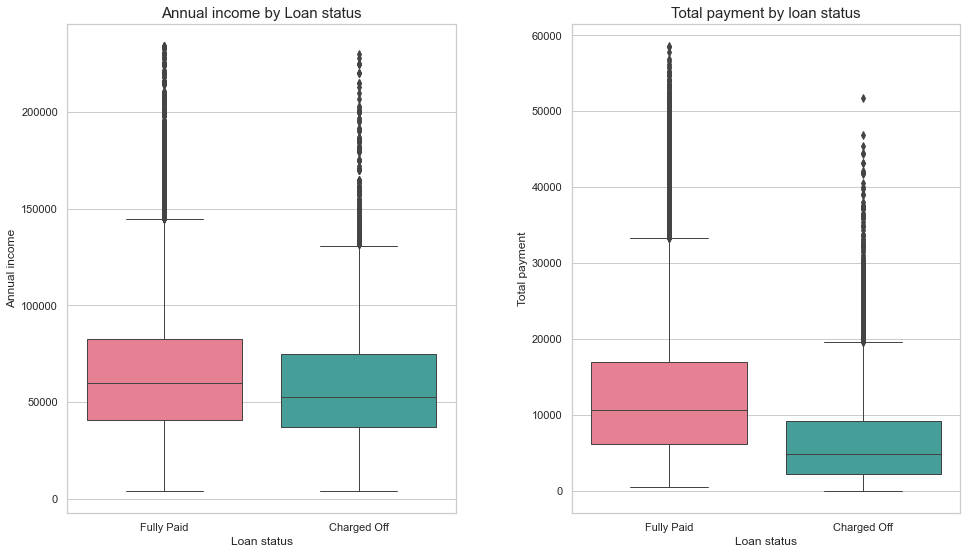

In [53]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(16,9))

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y=filtered_annual_income.annual_inc, color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Annual income by Loan status", fontsize=15)
axs[0].set_ylabel('Annual income')
axs[0].set_xlabel('Loan status')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y=loan_data.total_pymnt, color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Total payment by loan status', fontsize=15)
axs[1].set_ylabel('Total payment')
axs[1].set_xlabel('Loan status')


plt.subplots_adjust(wspace=0.3)
plt.show()


In [54]:
loan_data.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,62427.30,47776.01,4080.00,37000.00,53000.00,75000.00,1250000.00
Fully Paid,32950.00,69862.50,66562.25,4000.00,41132.75,60000.00,84000.00,6000000.00


In [55]:
loan_data.groupby('loan_status')['total_pymnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,6838.03,6615.86,0.00,2215.57,4839.00,9191.71,51745.45
Fully Paid,32950.00,12725.78,8850.88,526.33,6139.83,10687.16,17025.79,58563.68


**Observations**
- People with less annual income have more chance of charge off. Half of people who defaulted have annual income b/w 37000 and 75000
- People with less total payment done will have more chances of charge off. Half of the people who defaulted have total payment b/w 2200 and 9200. This might not be useful for our analysis as we already have given loan.

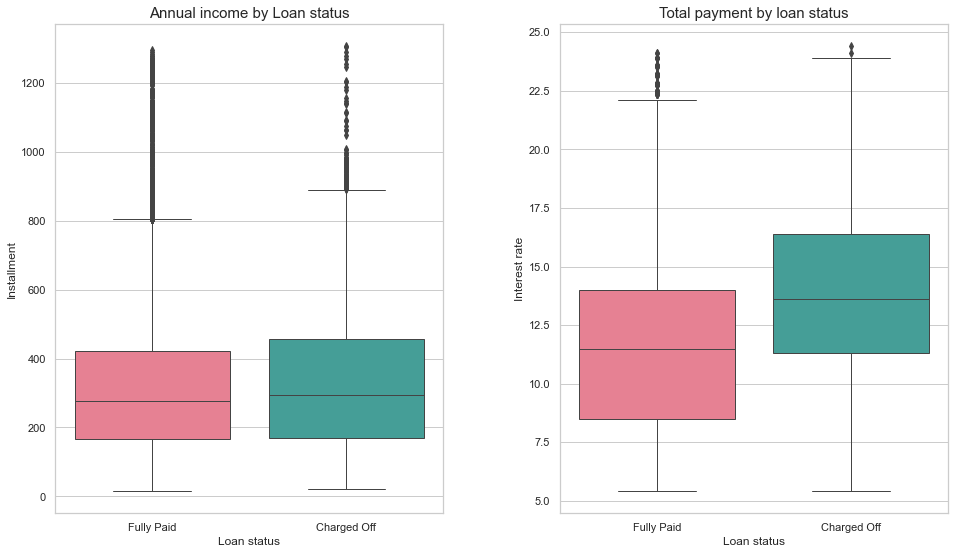

In [56]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(16,9))

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y=loan_data.installment, color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Annual income by Loan status", fontsize=15)
axs[0].set_ylabel('Installment')
axs[0].set_xlabel('Loan status')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y=loan_data.int_rate, color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Total payment by loan status', fontsize=15)
axs[1].set_ylabel('Interest rate')
axs[1].set_xlabel('Loan status')


plt.subplots_adjust(wspace=0.3)
plt.show()


In [57]:
loan_data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,13.82,3.65,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.00,11.61,3.60,5.42,8.49,11.49,13.99,24.11


**Observations**
- Loans with higher interst rate leads to charge off. Around half of fully paid loans are in 8.5 to 14 interest rate.

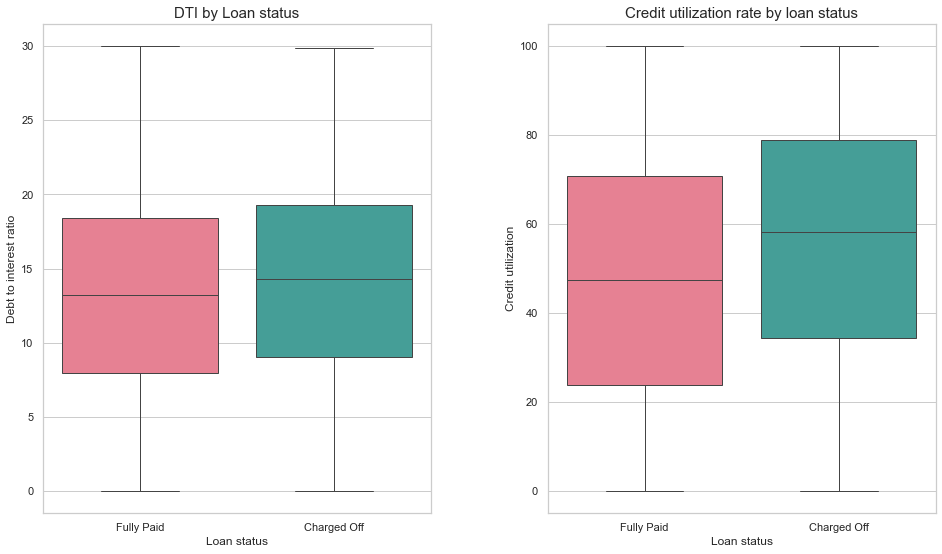

In [58]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(16,9))

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y=loan_data.dti, color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("DTI by Loan status", fontsize=15)
axs[0].set_ylabel('Debt to interest ratio')
axs[0].set_xlabel('Loan status')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y=loan_data.revol_util, color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Credit utilization rate by loan status', fontsize=15)
axs[1].set_ylabel('Credit utilization')
axs[1].set_xlabel('Loan status')


plt.subplots_adjust(wspace=0.3)
plt.show()


In [59]:
loan_data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,14.00,6.59,0.00,9.05,14.29,19.29,29.85
Fully Paid,32950.00,13.15,6.68,0.00,7.98,13.20,18.39,29.99


In [60]:
loan_data.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,55.41,28.02,0.00,34.30,58.20,78.95,99.90
Fully Paid,32950.00,47.48,28.30,0.00,23.80,47.50,70.80,99.90


**Observation**
- Lower debt to interest ratio have higher chances of full payback. Half of the people have ratio between 8 and 18 percent
- Higher credit utilization rate results in more chances of default. Half of the people have rate between 34 and 79 default

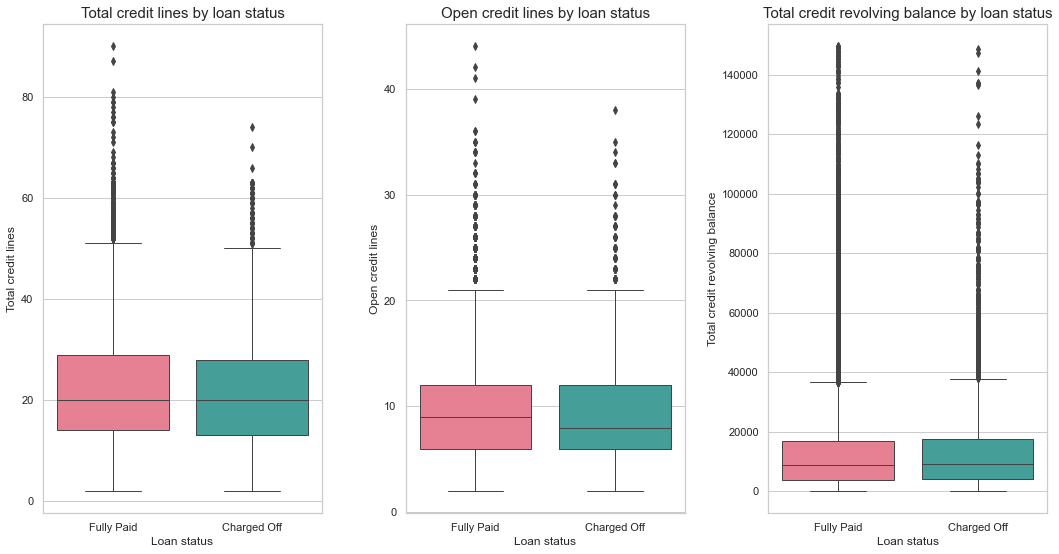

In [61]:
# total_acc, revol_bal, open_acc
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize=(18,9))

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y=loan_data.total_acc, color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Total credit lines by loan status", fontsize=15)
axs[0].set_ylabel('Total credit lines')
axs[0].set_xlabel('Loan status')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y=loan_data.open_acc, color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Open credit lines by loan status', fontsize=15)
axs[1].set_ylabel('Open credit lines')
axs[1].set_xlabel('Loan status')

sns.boxplot(ax=axs[2], data=loan_data, x='loan_status', y=loan_data.revol_bal, color="lightblue", linewidth=1, palette="husl")
axs[2].set_title('Total credit revolving balance by loan status', fontsize=15)
axs[2].set_ylabel('Total credit revolving balance')
axs[2].set_xlabel('Loan status')


plt.subplots_adjust(wspace=0.3)
plt.show()


In [62]:
loan_data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.00,21.43,11.45,2.00,13.00,20.00,28.00,74.00
Fully Paid,32950.00,22.16,11.42,2.00,14.00,20.00,29.00,90.00


We can't find a clear relationship b/w Fully paid and Charged off in case of:
- Total credit lines
- Open credit lines
- Total credit revolving balance

#### Correlation b/w features

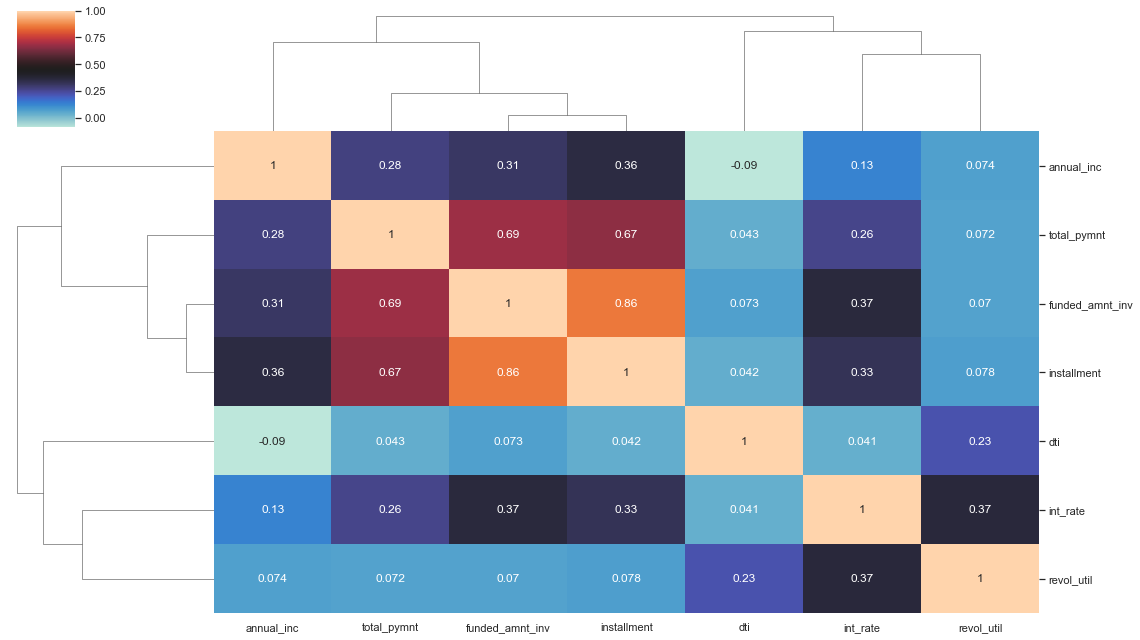

In [63]:
# Correlation matrix for people who have defaulted.
defaulted_entries = loan_data.loc[loan_data['loan_status'] == 'Charged Off'][['funded_amnt_inv', 'annual_inc', 'dti', 'int_rate', 'revol_util', 'installment', 'total_pymnt']]

sns.clustermap(defaulted_entries.corr(),annot=True,figsize=(16, 9),cmap="icefire")

plt.show()

**Observation**
- We don't find any meaningful correlation between parameters when loan is paid back.
- Relatively high correlation b/w total payment and funded amount by investor, installment and funder amount by investor is understandable. More the loan amount higher the payment and installments. Although this is not very high as money wasn't returned.
- There is not much to conclude from the above cluster map.

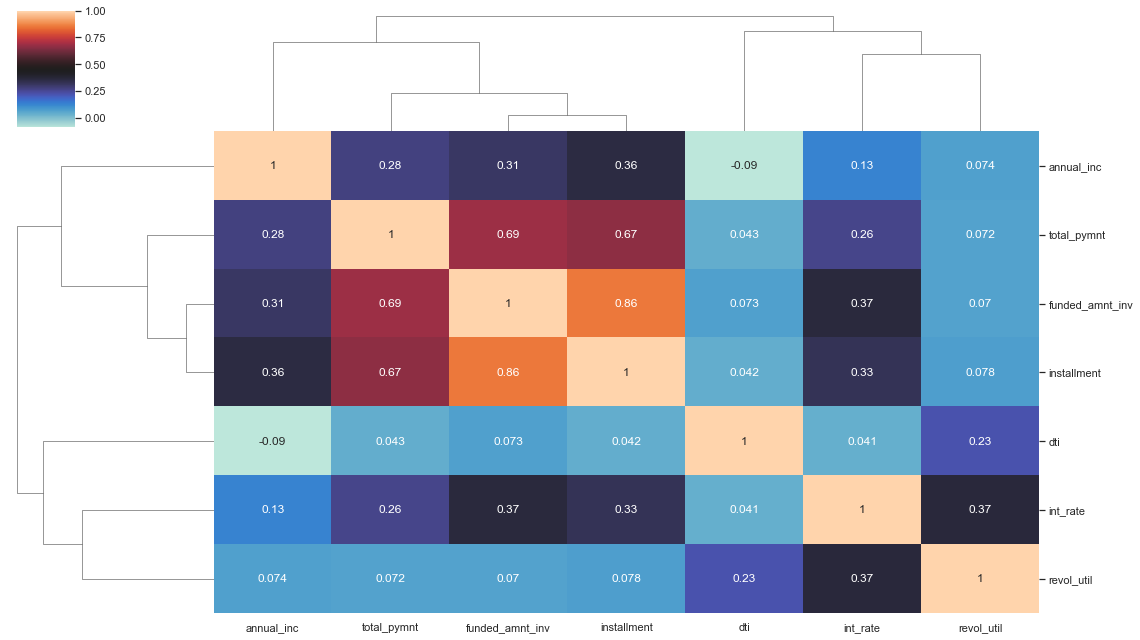

In [64]:
# Correlation matrix for people who have defaulted.
defaulted_entries = loan_data.loc[loan_data['loan_status'] == 'Charged Off'][['funded_amnt_inv', 'annual_inc', 'dti', 'int_rate', 'revol_util', 'installment', 'total_pymnt']]

sns.clustermap(defaulted_entries.corr(),annot=True,figsize=(16, 9),cmap="icefire")

plt.show()

**Observation**
- We don't find any meaningful correlation between parameters when loan is paid back.
- Very high correlation b/w total payment and funded amount by investor, installment and funder amount by investor is understandable. This makes sense as money was returned.
- There is not much to conclude from the above cluster map.

#### Bivariate analysis

In [65]:
def add_charge_off_perc_to_df(df):
    choff = df['Charged Off']
    fpaid = df['Fully Paid']
    df['Charged Off Percentage'] = 100 * choff / (choff + fpaid)
    return df

In [66]:
def plot_default_percentage(df, figsize = (12, 8), rotate_x = None, rotate_y = None, ylabel='Charge off Percentage', xlabel=None):
    df['Charged Off Percentage'].plot(kind='bar', figsize=figsize, color='orange')
    plt.title(xlabel + ' vs ' + ylabel,color='black',fontsize=12)
    plt.ylabel(ylabel,color='black',fontsize=10)
    plt.xlabel(xlabel,color = 'black',fontsize=10)  
    plt.xticks(rotation=rotate_x)
    plt.yticks(rotation=rotate_y)

    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='red', xytext=(0, 5),
                    textcoords='offset points')
    
    plt.show()


In [67]:
purpose_loan_status_cross_table = pd.crosstab(loan_data['purpose'], loan_data['loan_status'])
add_charge_off_perc_to_df(purpose_loan_status_cross_table)
purpose_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False).head()

loan_status,Charged Off,Fully Paid,Charged Off Percentage
purpose,,,
small_business,475,1279,27.08
renewable_energy,19,83,18.63
educational,56,269,17.23
other,633,3232,16.38
house,59,308,16.08


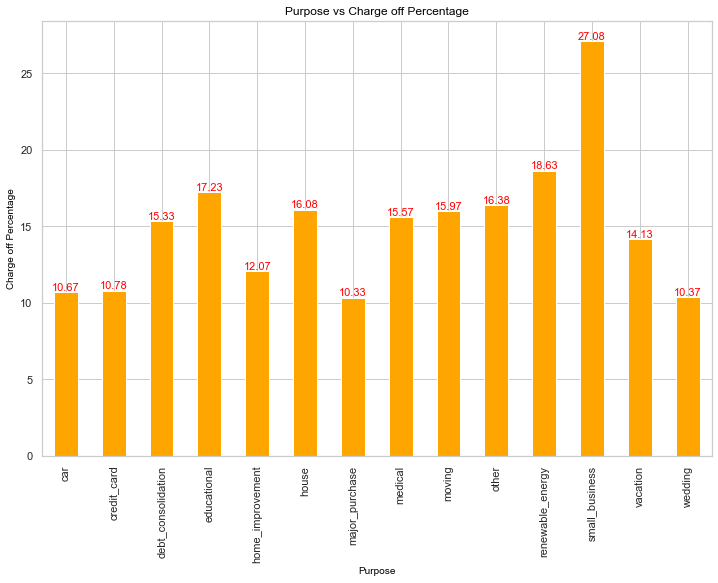

In [68]:
fig, ax = plt.subplots()
plot_default_percentage(purpose_loan_status_cross_table, rotate_x=90, ylabel='Charge off Percentage', xlabel='Purpose')

**Observations**
- High percentage of defaults happen for Small business (`27%`), renewable energy (`18.6%`) and educational loans `(17.2%`)

In [69]:
term_loan_status_cross_table = pd.crosstab(loan_data['term'], loan_data['loan_status'])
add_charge_off_perc_to_df(term_loan_status_cross_table)
term_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False)

loan_status,Charged Off,Fully Paid,Charged Off Percentage
term,,,
60 months,2400,7081,25.31
36 months,3227,25869,11.09


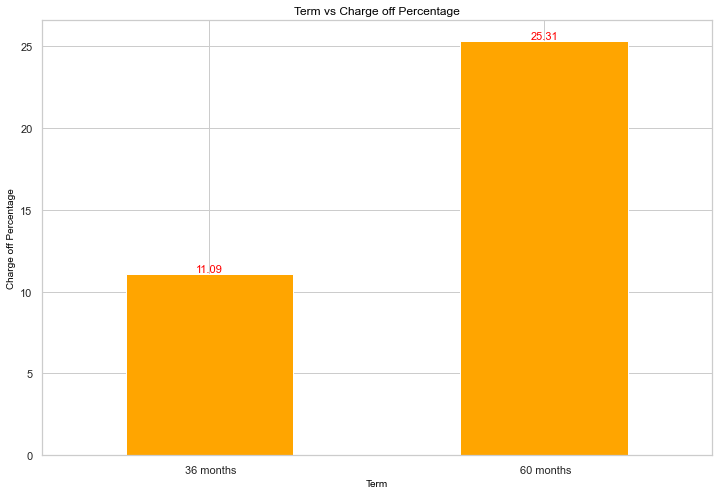

In [70]:
fig, ax = plt.subplots()
plot_default_percentage(term_loan_status_cross_table, ylabel='Charge off Percentage', xlabel='Term')

**Observation**
- Higher percentage of defaults happen in 60 months term (`25%`)

In [71]:
grade_loan_status_cross_table = pd.crosstab(loan_data['grade'], loan_data['loan_status'])
add_charge_off_perc_to_df(grade_loan_status_cross_table)
grade_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False)

loan_status,Charged Off,Fully Paid,Charged Off Percentage
grade,,,
G,101,198,33.78
F,319,657,32.68
E,715,1948,26.85
D,1118,3967,21.99
C,1347,6487,17.19
B,1425,10250,12.21
A,602,9443,5.99


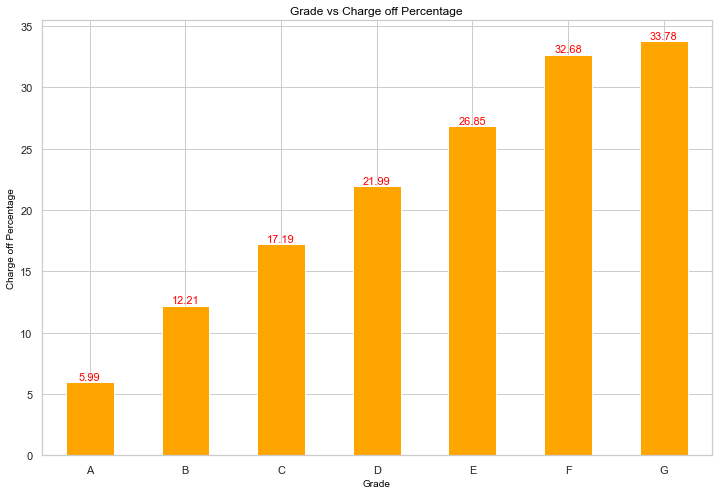

In [72]:
fig, ax = plt.subplots()
plot_default_percentage(grade_loan_status_cross_table, ylabel='Charge off Percentage', xlabel='Grade')

**Observation**
- We see very defaults increases with reduction in loan grade

In [73]:
sub_grade_loan_status_cross_table = pd.crosstab(loan_data['sub_grade'], loan_data['loan_status'])
add_charge_off_perc_to_df(sub_grade_loan_status_cross_table)
sub_grade_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False).head()

loan_status,Charged Off,Fully Paid,Charged Off Percentage
sub_grade,,,
F5,54,59,47.79
G3,19,26,42.22
G2,28,49,36.36
F4,53,98,35.10
G5,10,19,34.48


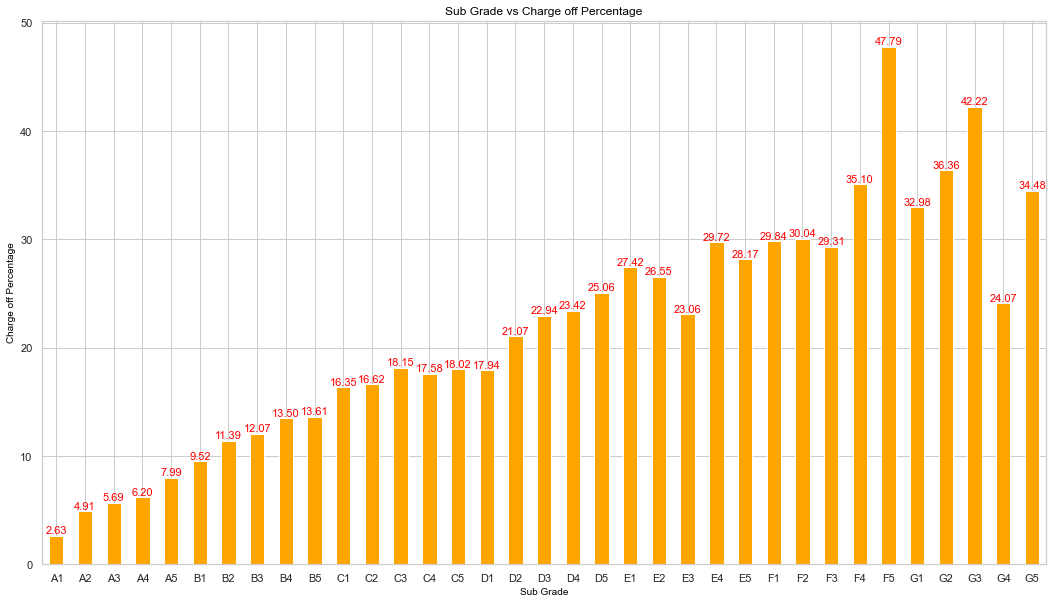

In [74]:
fig, ax = plt.subplots()
plot_default_percentage(sub_grade_loan_status_cross_table, figsize=(18, 10), ylabel='Charge off Percentage', xlabel='Sub Grade')

**Observation**
- Sub-grades follow similar pattern as grades with some exceptions. F5 and G3 sub grade loans have very high defaults.

In [75]:
home_ownership_loan_status_cross_table = pd.crosstab(loan_data['home_ownership'], loan_data['loan_status'])
add_charge_off_perc_to_df(home_ownership_loan_status_cross_table)
home_ownership_loan_status_cross_table = home_ownership_loan_status_cross_table[ (home_ownership_loan_status_cross_table['Charged Off'] >= 100) ]
home_ownership_loan_status_cross_table[ (home_ownership_loan_status_cross_table['Charged Off'] >= 100) ].sort_values(by='Charged Off Percentage', ascending=False)

loan_status,Charged Off,Fully Paid,Charged Off Percentage
home_ownership,,,
RENT,2839,15641,15.36
OWN,443,2532,14.89
MORTGAGE,2327,14694,13.67


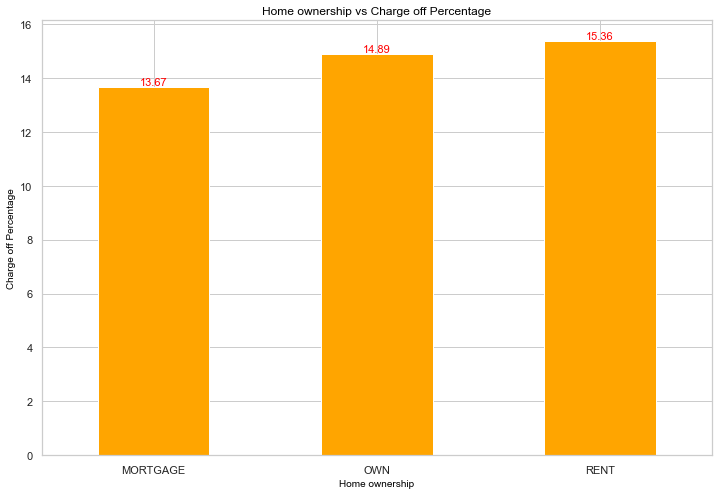

In [76]:
fig, ax = plt.subplots()
plot_default_percentage(home_ownership_loan_status_cross_table, ylabel='Charge off Percentage', xlabel='Home ownership')

**Observation**
- Home ownership marked as Rent have slightly higher chance to default

In [77]:
verification_status_loan_status_cross_table = pd.crosstab(loan_data['verification_status'], loan_data['loan_status'])
add_charge_off_perc_to_df(verification_status_loan_status_cross_table)
verification_status_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False)

loan_status,Charged Off,Fully Paid,Charged Off Percentage
verification_status,,,
Verified,2051,10155,16.80
Source Verified,1434,8243,14.82
Not Verified,2142,14552,12.83


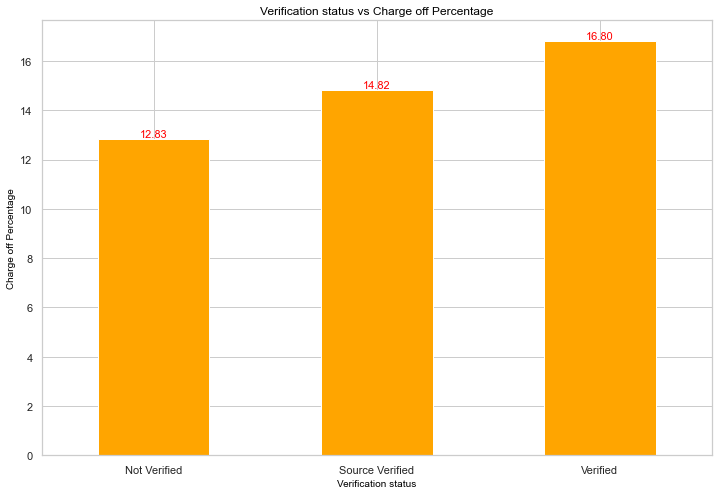

In [78]:
fig, ax = plt.subplots()
plot_default_percentage(verification_status_loan_status_cross_table, ylabel='Charge off Percentage', xlabel='Verification status')

**Obseration**
- People with verified income source have higher chance to default.

In [79]:
addr_state_loan_status_cross_table = pd.crosstab(loan_data['addr_state'], loan_data['loan_status'])
add_charge_off_perc_to_df(addr_state_loan_status_cross_table)
addr_state_loan_status_cross_table = addr_state_loan_status_cross_table[ (addr_state_loan_status_cross_table['Charged Off'] >= 100) ]
addr_state_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False).head()

loan_status,Charged Off,Fully Paid,Charged Off Percentage
addr_state,,,
NV,108,371,22.55
FL,504,2277,18.12
MO,114,556,17.01
CA,1125,5824,16.19
MD,162,861,15.84


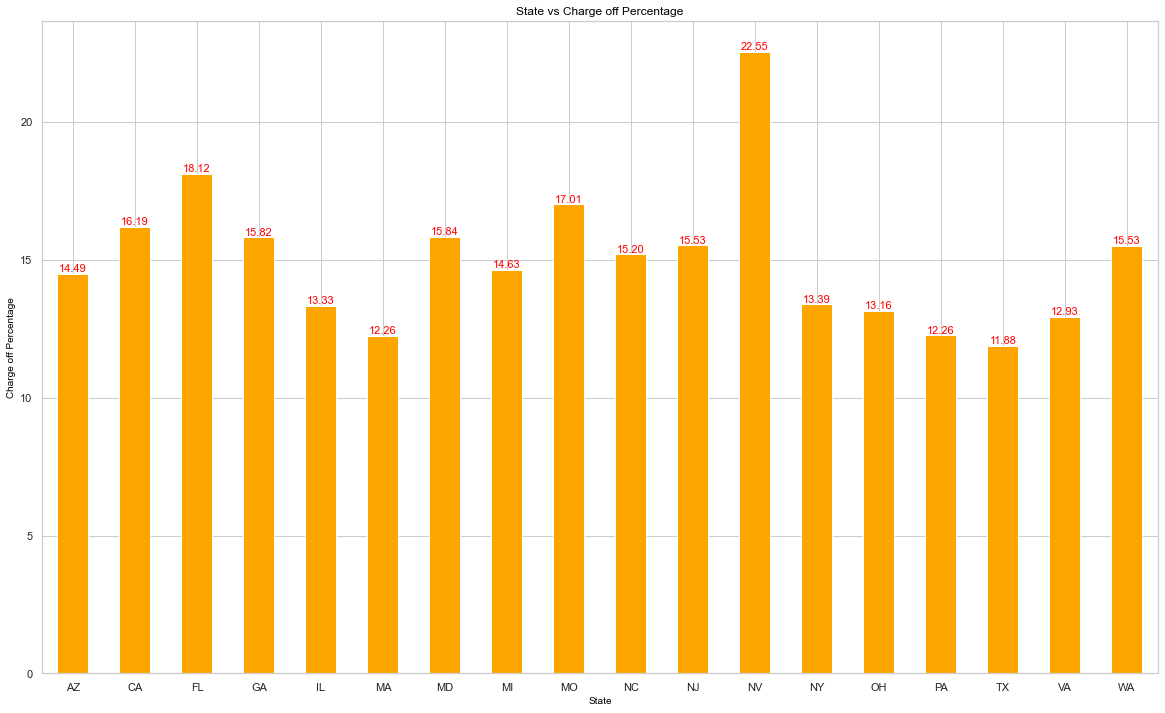

In [91]:
fig, ax = plt.subplots()
plot_default_percentage(addr_state_loan_status_cross_table, figsize=(20, 12), ylabel='Charge off Percentage', xlabel='State')

**Observation**
- Applicants from states `Nevada`, `Florida`, `Missouri` have higher chances of defaults

In [90]:
issue_year_state_loan_status_cross_table = pd.crosstab(loan_data['issue_year'], loan_data['loan_status'])
add_charge_off_perc_to_df(issue_year_state_loan_status_cross_table)
issue_year_state_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False).head()

loan_status,Charged Off,Fully Paid,Charged Off Percentage
issue_year,,,
2007,45,206,17.93
2011,3256,17260,15.87
2008,247,1315,15.81
2010,1485,10047,12.88
2009,594,4122,12.60


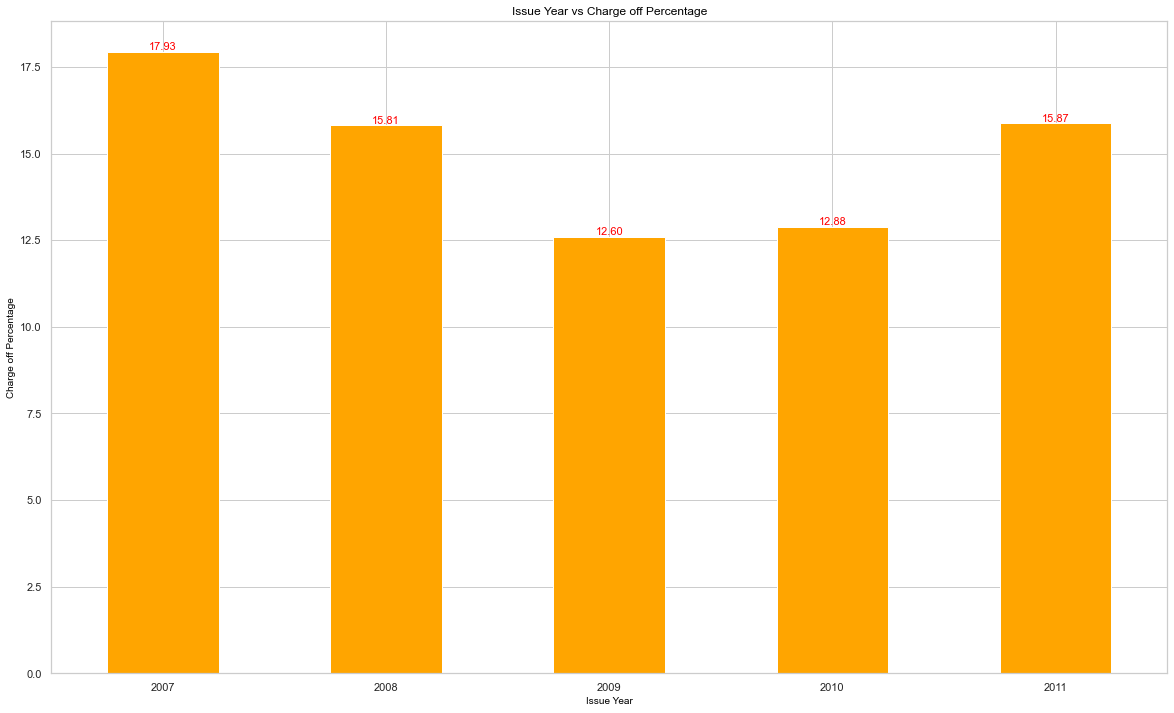

In [92]:
fig, ax = plt.subplots()
plot_default_percentage(issue_year_state_loan_status_cross_table, figsize=(20, 12), ylabel='Charge off Percentage', xlabel='Issue Year')

**Observation**
- Default percentage was high 1 year before 2008. Probably, this is what led to 2008 loan crisis. 

In [96]:
issue_month_state_loan_status_cross_table = pd.crosstab(loan_data['issue_month'], loan_data['loan_status'])
add_charge_off_perc_to_df(issue_month_state_loan_status_cross_table)
issue_month_state_loan_status_cross_table.sort_values(by='Charged Off Percentage', ascending=False).head()

loan_status,Charged Off,Fully Paid,Charged Off Percentage
issue_month,,,
12,678,3537,16.09
5,466,2453,15.96
9,547,2951,15.64
10,580,3181,15.42
6,483,2697,15.19


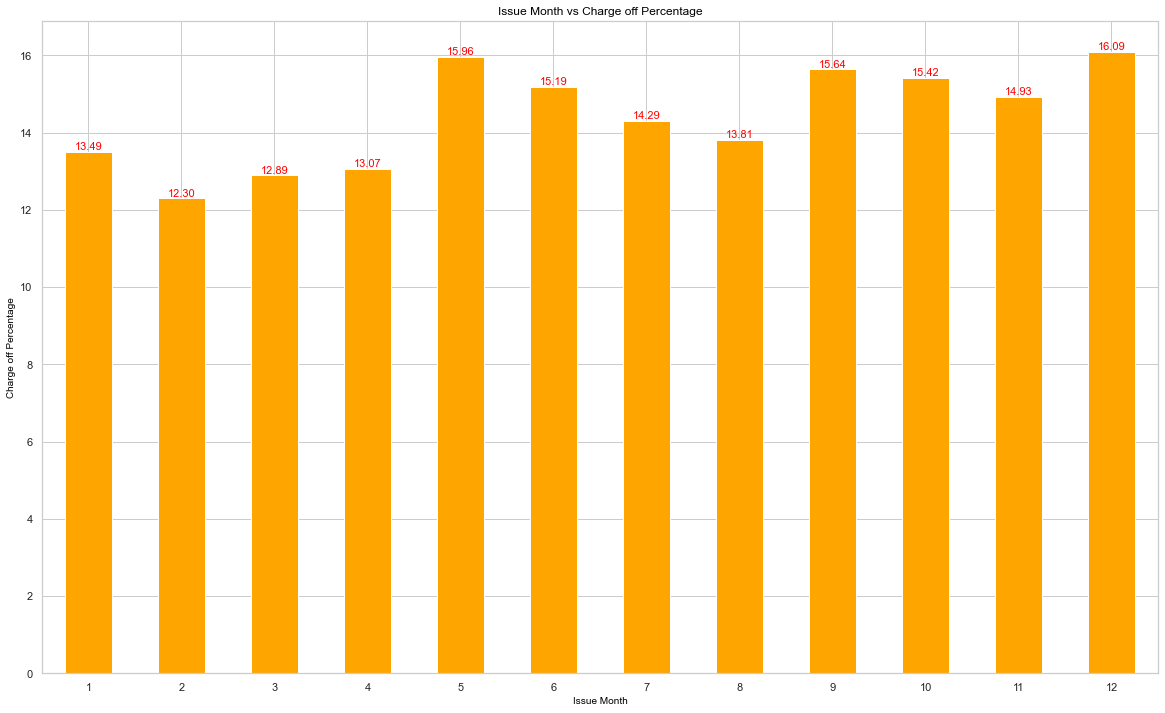

In [94]:
fig, ax = plt.subplots()
plot_default_percentage(issue_month_state_loan_status_cross_table, figsize=(20, 12), ylabel='Charge off Percentage', xlabel='Issue Month')

**Observation**
- Nothing concrete can be concluded using this

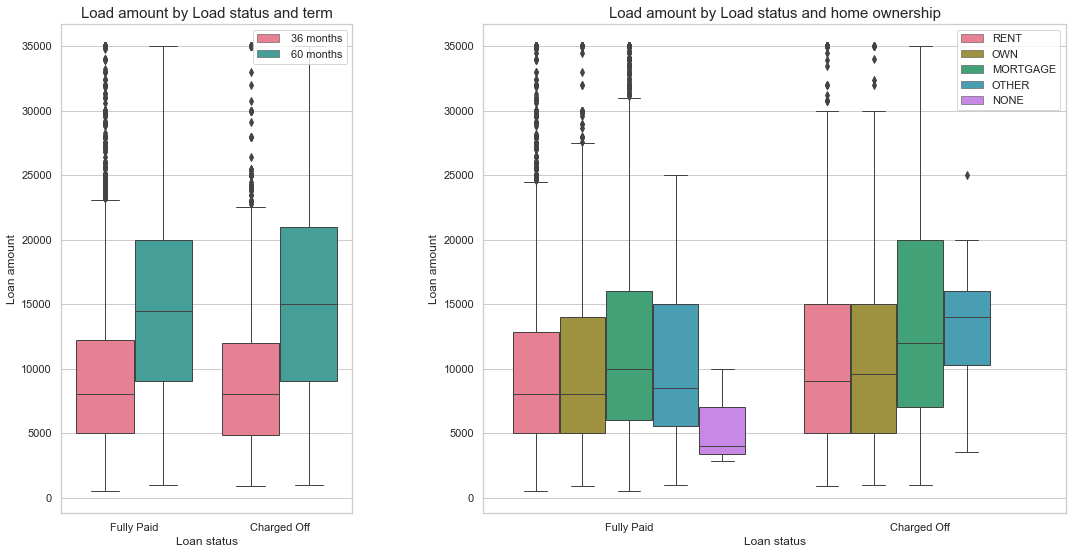

In [81]:
# total_acc, revol_bal, open_acc
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(18,9), gridspec_kw={'width_ratios': [1, 2]})

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y='loan_amnt', hue = 'term', color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Load amount by Load status and term", fontsize=15)
axs[0].set_ylabel('Loan amount')
axs[0].set_xlabel('Loan status')
axs[0].legend(loc='upper right')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y='loan_amnt', hue = 'home_ownership', color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Load amount by Load status and home ownership', fontsize=15)
axs[1].set_ylabel('Loan amount')
axs[1].set_xlabel('Loan status')
axs[1].legend(loc='upper right')

plt.subplots_adjust(wspace=0.3)
plt.show()

**Observation**
- If home ownership is mortgage and loan amount is high, there is a higher chance of default.

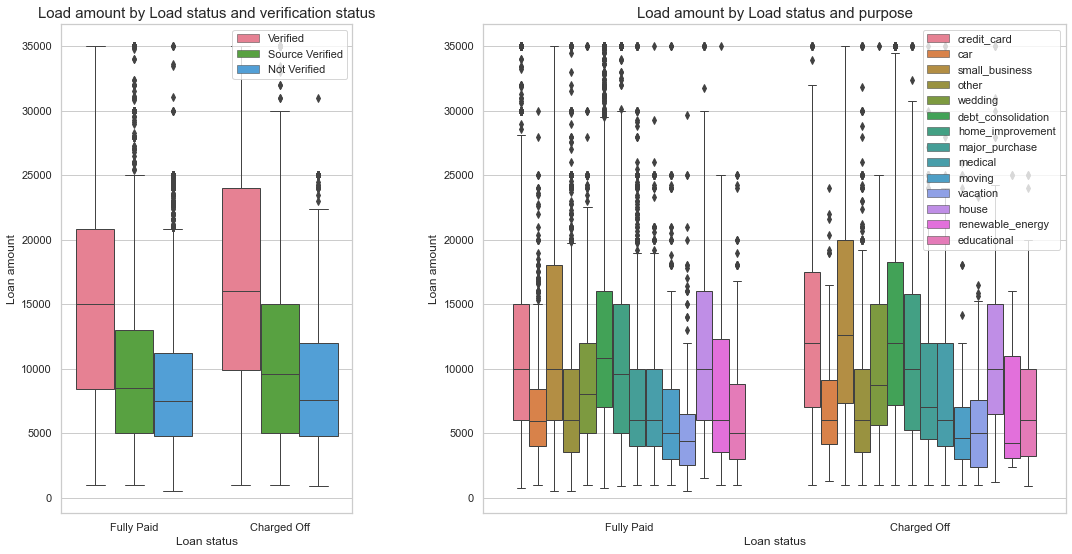

In [82]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(18,9), gridspec_kw={'width_ratios': [1, 2]})

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y='loan_amnt', hue = 'verification_status', color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Load amount by Load status and verification status", fontsize=15)
axs[0].set_ylabel('Loan amount')
axs[0].set_xlabel('Loan status')
axs[0].legend(loc='upper right')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y='loan_amnt', hue = 'purpose', color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Load amount by Load status and purpose', fontsize=15)
axs[1].set_ylabel('Loan amount')
axs[1].set_xlabel('Loan status')
axs[1].legend(loc='upper right')

plt.subplots_adjust(wspace=0.3)
plt.show()

**Observation**
- No new observation in first plot, we already know that verified people have high default chance.
- In second plot, as loan amount for small business increase, we have higher chances of default.


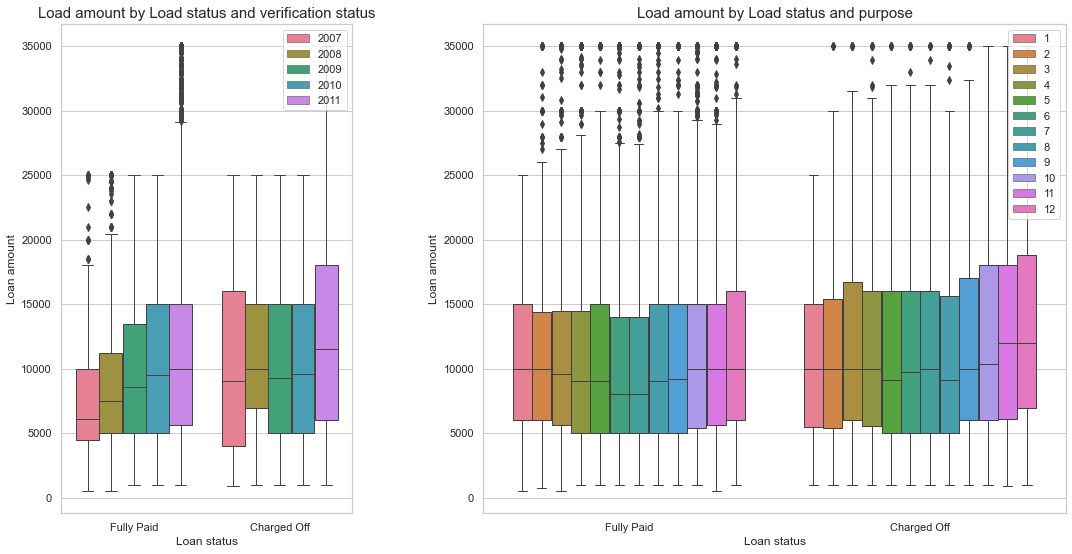

In [114]:
fig, axs = plt.subplots(nrows=1, ncols = 2, figsize=(18,9), gridspec_kw={'width_ratios': [1, 2]})

sns.boxplot(ax=axs[0], data=loan_data, x = 'loan_status', y='loan_amnt', hue = 'issue_year', color="lightblue", linewidth=1, palette="husl")
axs[0].set_title("Load amount by Load status and verification status", fontsize=15)
axs[0].set_ylabel('Loan amount')
axs[0].set_xlabel('Loan status')
axs[0].legend(loc='upper right')
                                                   
sns.boxplot(ax=axs[1], data=loan_data, x='loan_status', y='loan_amnt', hue = 'issue_month', color="lightblue", linewidth=1, palette="husl")
axs[1].set_title('Load amount by Load status and purpose', fontsize=15)
axs[1].set_ylabel('Loan amount')
axs[1].set_xlabel('Loan status')
axs[1].legend(loc='upper right')

plt.subplots_adjust(wspace=0.3)
plt.show()

**Observation**
- No concrete pattern here, except for higher default in 2007 due to banking crisis.

### Conclusion

#### Univariate analysis result
- We did univariate analysis to get a feeling of our data and understand distriution of variables.
- We don't have any conclusion pertaining to our use-case

#### Segmented univariate analysis result

- Higher loan amount were alloted to people who defaulted.
- Applicants with less annual income have more chance of defaulting. Half of people who defaulted have annual income b/w 37000 and 75000
- Loans with higher interst rate lead to a default. Half of fully paid loans are in 8.5 to 14 interest rate.
- Lower debt to interest ratio have higher chances of full payback. Half of the fully paid loan have dti ratio between 8 and 18 percent
- Higher credit utilization rate, results into more chances of a default. Half of the people who defaulted have this rate between 34 and 79.

#### Correlation b/w columns
- No interesting pattern related to our use-case found.
    
#### Bivariate analysis
- High percentage of defaults happen for the small business, renewable energy and educational loans.
- There are higher chances of a default happen in 60 months term.
- Defaults are inversely proportional to the loan grade. Higher the grade, lesser the defaults.
- Applicants whose home ownership is rent have slightly higher chance of defaulting
- Applicants with a verified income source have slightly higher chance of defaulting.
- Applicants from states Nevada, Florida, Missouri have higher chance of defaulting.
- If home ownership is of mortgage type and loan amount is high, there is a higher chance of default.
- As loan amount for small business increase, we have higher chances of default.
